In [1]:
from tStudy.AI_Fish import *
import cv2
from time import sleep
from tStudy.Tracker import Linker
from tStudy.FlowMethod.extract import extract as extractFM
from tStudy.Image2Blobs import start
zebrafish_60 = "/mnt/HDD-1/schristo/CollectiveBehaviour/Data/60_zebrafish/group_1/video_04-07-17_10-07-50.000.avi"
from time import sleep


rad = (5,10)
img_shape = (600,1200,3)

Video_param = {
"img_shape" : img_shape,
"radius"    : rad,
"start_area": (rad[1]*5,img_shape[0]-20),
"velocity"  : 5,
"direction" : [1,0],
"nbr"       : 30,
"seed"      : 150,
}

video = SchoolOfFishStream_AI(**Video_param)
blobs = start(video)


In [2]:
def show_image(a, fmt='jpeg'):
    ##
    # Display Image-stream in ipython
    # Does not work smoothly in firefox
    #
    
    import numpy as np
    from IPython.display import clear_output, Image, display
    from io import StringIO, BytesIO
    import PIL.Image
    from time import sleep
    
    faux_file = BytesIO()
    
    a = np.uint8(np.clip(a, 0, 255))
    PIL.Image.fromarray(a).save(faux_file, fmt)
    clear_output(wait=True)
    imgdata = Image(data=faux_file.getvalue())
    display(imgdata)

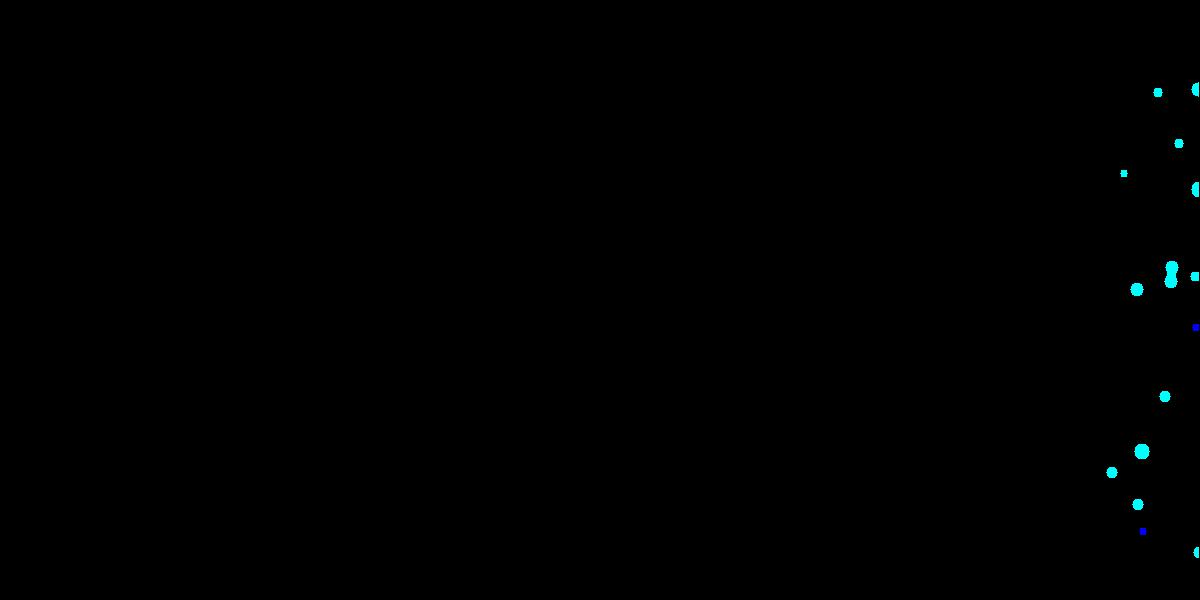

IndexError: list index out of range

In [3]:


def try2seperate(individuals,bloblist):
    for blobs in bloblist:
        img = np.zeros(img_shape)
        sorted_blobs = sorted(blobs)
        miss = individuals-len(sorted_blobs)
        
        for i in range(miss):
            blob = sorted_blobs[i]
            blob.blob2img(img,color=[0,255,255])
            
        for blob in sorted_blobs[miss:]:
            
            
            if len(blob)<50:
                blob.blob2img(img,color=[0,255,0])
            else:
                blob.blob2img(img)
            
    
        show_image(img)
        sleep(0.5)
    
try2seperate(30,blobs)

In [ ]:
video = SchoolOfFishStream_AI(**Video_param)
img = video()
from scipy import ndimage

def gradient(img):
    sx = [[0,0,0],[0.5,0,0.5],[0,0,0]]
    sy = [[0,0.5,0],[0,0,0],[0,0.5,0]]
    
    x = np.zeros_like(img)
    y = np.zeros_like(img)
    
    
    
    
while img is not None:
    
    sx = ndimage.sobel(img,axis=0,mode='constant')
    sy = ndimage.sobel(img,axis=1,mode='constant')
    sobel=np.hypot(sx,sy)
    sobel = ((sobel-sobel.min())*255/sobel.max())
    print(sobel.min(),sobel.max())
    break
    img = img - sobel
    show_image(img)
    img = video()